<a href="https://colab.research.google.com/github/mknguyen1202/ECE180_HW4/blob/main/ECE180_S21_HW4_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
## might need to enter authorization code
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


First, we get the data from CIFAR.

In [17]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar xvzf cifar-10-python.tar.gz

--2021-05-01 23:41:38--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... failed: Connection timed out.
Retrying.

--2021-05-01 23:42:11--  (try: 2)  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  73.9MB/s    in 2.2s    

2021-05-01 23:42:13 (73.9 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-bat

Navigate to the data folder

In [19]:
%cd cifar-10-batches-py/

[Errno 2] No such file or directory: 'cifar-10-batches-py/'
/content/cifar-10-batches-py/cifar-10-batches-py/cifar-10-batches-py


In [20]:
# import necessary libraries
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats

In [21]:
# Pre-processing the data

def load_data(batchname):
  with open(batchname, 'rb') as fo:
        batch = pickle.load(fo, encoding='bytes')
  return np.array(batch[b'labels']), np.array(batch[b'data'].astype('int64'))


train_labels, train_data = load_data('data_batch_1')
test_labels, test_data = load_data('test_batch')

NUMBER_OF_SAMPLES = 1000
test_data = test_data[0:NUMBER_OF_SAMPLES]
test_labels = test_labels[0:NUMBER_OF_SAMPLES]

The KNN class:

In [32]:
class KNN:
  def __init__(self):
    self.predicted = np.empty(NUMBER_OF_SAMPLES) 

  def fit(self, k, train_data, train_labels, test_data, test_labels):
    N = len(test_data)
    error = 0
    closest_ndxs = np.empty(k)
    for i in range(N):
      distances = np.sqrt(np.sum((train_data - test_data[i])**2, axis = 1)) # all distances
      closest_ndxs = np.argpartition(distances, k)[:k]                      # indices of the k lowest elements)
      self.predicted[i] = stats.mode(train_labels[closest_ndxs])[0]         # the most frequent element
      if test_labels[i] != self.predicted[i]:
        error += 1
    error /= N
    return error
  
  def fit_specific(self, k, test_ndx, train_data, train_labels, test_data, test_labels):
      closest_ndxs = np.empty(k)
      distances = np.sqrt(np.sum((train_data - test_data[ndx])**2, axis = 1)) # all distances
      closest_ndxs = np.argpartition(distances, k)[:k]                      # indices of the k lowest elements)
      return train_labels[closest_ndxs]
 



a) Pe = Number of Wrongly Classified Test Samples / Total Number of Test Samples. What is the error rate of your classification?


In [23]:

model = KNN()
ks = [1, 2, 5, 10, 20]  # run with each k
errors = [model.fit(k, train_data, train_labels, test_data, test_labels) for k in ks]
print("The error rate for each k:")
for i in range(len(errors)):
  print(f"k = {ks[i]}: {errors[i]}")

The error rate for each k:
k = 1: 0.717
k = 2: 0.748
k = 5: 0.704
k = 10: 0.712
k = 20: 0.703


b) Repeat last step for k = 2, 5, 10, 20 and plot the error rate Pe against k. Is the error rate decreases with k? Should the error rate always decrease with k? 

Running the dataset through the model, we got the following result.



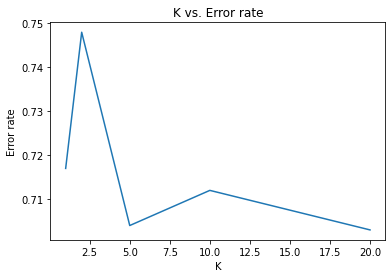

In [24]:
plt.plot(ks,errors)
plt.title('K vs. Error rate')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

In [33]:

k = 10
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
model = KNN()
for i in range(len(labels)):
  print(f"Actual label: {labels[i]}")
  ndx = int(np.where(test_labels==i)[0][0])
  predicted = model.fit_specific(k, ndx, train_data, train_labels, test_data, test_labels)
  print(f"Closest predicted labels:")
  for i in predicted:
    print(labels[i])
  print()

  
  


Actual label: Airplane
Closest predicted labels:
Airplane
Ship
Ship
Bird
Ship
Ship
Bird
Ship
Airplane
Deer

Actual label: Automobile
Closest predicted labels:
Frog
Deer
Cat
Ship
Dog
Frog
Bird
Frog
Deer
Deer

Actual label: Bird
Closest predicted labels:
Deer
Deer
Deer
Frog
Airplane
Frog
Deer
Frog
Deer
Ship

Actual label: Cat
Closest predicted labels:
Frog
Deer
Deer
Bird
Frog
Deer
Deer
Frog
Deer
Horse

Actual label: Deer
Closest predicted labels:
Airplane
Airplane
Airplane
Airplane
Airplane
Frog
Bird
Airplane
Cat
Airplane

Actual label: Dog
Closest predicted labels:
Dog
Deer
Dog
Dog
Frog
Frog
Cat
Frog
Cat
Deer

Actual label: Frog
Closest predicted labels:
Deer
Dog
Deer
Deer
Deer
Dog
Bird
Deer
Deer
Bird

Actual label: Horse
Closest predicted labels:
Deer
Frog
Horse
Frog
Frog
Automobile
Frog
Dog
Frog
Frog

Actual label: Ship
Closest predicted labels:
Ship
Ship
Airplane
Truck
Ship
Ship
Ship
Bird
Ship
Automobile

Actual label: Truck
Closest predicted labels:
Airplane
Ship
Ship
Horse
Deer
Tru